Resolución ejercicio clase 4
============================

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png" width="400">

In [ ]:
import numpy as np
from scipy.optimize import linprog

S=np.zeros((6,8))
S[0,0]=1
S[0,2]=-1
S[1,1]=2
S[1,2]=-2
S[1,3]=-2
S[2,2]=-1
S[2,3]=1
S[2,4]=1
S[2,6]=-1
S[3,2]=1
S[3,3]=-1
S[3,4]=1
S[4,3]=1
S[4,4]=-1
S[4,5]=-1
S[5,4]=2
S[5,7]=-2


b=np.zeros((6))
lb=np.zeros(8)
lb[6]=-1000
lb[0]=10
ub=np.array([1000]*8)
ub[0]=10
c=np.zeros(8)
c[6]=1
"""
    print "S"
    print S
    print "b"
    print b
    print "ub"
    print ub
    print "lb"
    print lb
    print "c"
    print c  """
res = linprog(-c, A_eq=S, b_eq=b, bounds=(zip(lb,ub))  )

print res.fun
rxns=["E1","E2","R1","R2","R3","E3","E4","E5"]
zip(rxns,res.x,lb,ub)

Clase 5
====

Objetivo:

* Introducción a cobrapy

La documentación oficial de cobra se encuentra disponible [aquí](http://cobrapy.readthedocs.io/en/0.4.0/getting_started.html). Hoy veremos los comandos escenciales de cobra y construiremos nuestra propia red metábolica.

Comandos básicos
--------------

Comezaremos cargado cobra y determinando que version está instalada (esto es útil para consultar la documentación adecuada; diferentes versiones de cobra tienen diferentes documentaciones)

In [23]:
import cobra
cobra.__version__

'0.15.1'

A modo de ejemplo importaremos la red metabólica de Escherichia coli

In [ ]:
import cobra.test

# "ecoli" and "salmonella" are also valid arguments
model = cobra.test.create_test_model("ecoli")

Veamos cuantas reacciones y metabolitos tiene "ecoli"

In [24]:
print(len(model.reactions))
print(len(model.metabolites))

2583
1805


Podemos inspeccionar reacciones individualmente. Por ejemplo, para ver la reacción 30:

In [25]:
print model.reactions[10].reaction

14glucan_e --> 


Ver las primeras 10 reacciones:

In [26]:
for i in range(10):
    print model.reactions[i]

DM_4CRSOL: 4crsol_c --> 
DM_5DRIB: 5drib_c --> 
DM_AACALD: aacald_c --> 
DM_AMOB: amob_c --> 
DM_MTHTHF: mththf_c --> 
DM_OXAM: oxam_c --> 
Ec_biomass_iJO1366_WT_53p95M: 0.000223 10fthf_c + 0.000223 2dmmql8_c + 2.5e-05 2fe2s_c + 0.000248 4fe4s_c + 0.000223 5mthf_c + 0.000279 accoa_c + 0.000223 adocbl_c + 0.499149 ala__L_c + 0.000223 amet_c + 0.28742 arg__L_c + 0.234232 asn__L_c + 0.234232 asp__L_c + 54.119975 atp_c + 0.000116 bmocogdp_c + 2e-06 btn_c + 0.004952 ca2_c + 0.000223 chor_c + 0.004952 cl_c + 0.002944 clpn160_p + 0.00229 clpn161_p + 0.00118 clpn181_p + 0.000168 coa_c + 2.4e-05 cobalt2_c + 0.008151 colipa_e + 0.129799 ctp_c + 0.000674 cu2_c + 0.088988 cys__L_c + 0.024805 datp_c + 0.025612 dctp_c + 0.025612 dgtp_c + 0.024805 dttp_c + 0.000223 enter_c + 0.000223 fad_c + 0.006388 fe2_c + 0.007428 fe3_c + 0.255712 gln__L_c + 0.255712 glu__L_c + 0.595297 gly_c + 0.154187 glycogen_c + 0.000223 gthrd_c + 0.209121 gtp_c + 48.752916 h2o_c + 0.000223 hemeO_c + 0.092056 his__L_c + 0.2823

También podemos identificar una reacción por su nombre:

In [28]:
pgi = model.reactions.get_by_id("PGI")
print pgi
print pgi.reaction
print pgi.name


print(pgi.lower_bound, "< pgi <", pgi.upper_bound)

udcpdp = model.metabolites.get_by_id("udcpdp_c")
print udcpdp.reactions
print udcpdp.formula

PGI: g6p_c <=> f6p_c
g6p_c <=> f6p_c
glucose-6-phosphate isomerase
(-1000.0, '< pgi <', 1000.0)
frozenset([<Reaction MPTG2 at 0x7f91d69dc510>, <Reaction UDCPDP at 0x7f91d63acd50>, <Reaction MPTG at 0x7f91d69dc710>, <Reaction Ec_biomass_iJO1366_WT_53p95M at 0x7f91d760fb10>, <Reaction Ec_biomass_iJO1366_core_53p95M at 0x7f91d760fb90>, <Reaction UDCPDPS at 0x7f91d63acf90>])
C55H89O7P2


Podemos verificar el balance de masa de una reacción:

In [30]:
print "Balance de masa original"
print pgi.check_mass_balance()
print pgi.reaction

print "Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción"
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): -1})
pgi.reaction
print pgi.check_mass_balance()
print pgi.reaction

Balance de masa original
{'H': -1.0, 'charge': -1.0}
g6p_c + h_c <=> f6p_c
Veamos que pasa con el balance de masa si ahora agregamos un metabolito a la reacción
{'H': -2.0, 'charge': -2.0}
g6p_c + 2 h_c <=> f6p_c


In [31]:
pgi.add_metabolites({model.metabolites.get_by_id("h_c"): 2})
print pgi.reaction

g6p_c <=> f6p_c


In [32]:
print pgi.check_mass_balance()


{}


Tambien podemos ver cuales son las reacciones en las que un determinado metabólito está involucrado:

In [33]:
for rxn in model.metabolites.get_by_id("atp_c").reactions:
    print rxn, rxn.reaction

CU1abcpp: atp_c + cu_c + h2o_c --> adp_c + cu_p + h_c + pi_c atp_c + cu_c + h2o_c --> adp_c + cu_p + h_c + pi_c
AACPS9: ACP_c + atp_c + octa_c --> amp_c + ocACP_c + ppi_c ACP_c + atp_c + octa_c --> amp_c + ocACP_c + ppi_c
NMNAT: atp_c + h_c + nmn_c --> nad_c + ppi_c atp_c + h_c + nmn_c --> nad_c + ppi_c
METSOX2abcpp: atp_c + h2o_c + metsox__R__L_p --> adp_c + h_c + metsox__R__L_c + pi_c atp_c + h2o_c + metsox__R__L_p --> adp_c + h_c + metsox__R__L_c + pi_c
GALabcpp: atp_c + gal_p + h2o_c --> adp_c + gal_c + h_c + pi_c atp_c + gal_p + h2o_c --> adp_c + gal_c + h_c + pi_c
CU2abcpp: atp_c + cu2_c + h2o_c --> adp_c + cu2_p + h_c + pi_c atp_c + cu2_c + h2o_c --> adp_c + cu2_p + h_c + pi_c
AACPS5: ACP_c + atp_c + ocdcea_c --> amp_c + octeACP_c + ppi_c ACP_c + atp_c + ocdcea_c --> amp_c + octeACP_c + ppi_c
2AGPGAT180: 2agpg180_c + atp_c + ocdca_c --> amp_c + pg180_c + ppi_c 2agpg180_c + atp_c + ocdca_c --> amp_c + pg180_c + ppi_c
DDGALK: 2dh3dgal_c + atp_c --> 2dh3dgal6p_c + adp_c + h_c 2dh3d

Simulación de flujos metabólicos
================================

Para simular los flujos metabólicos optimizacmos los flujos de la red metabólica:

In [36]:
solution=model.optimize()
print model.summary()
print model.objective

IN FLUXES            OUT FLUXES    OBJECTIVES
-------------------  ------------  ----------------------
o2_e      17.6       h2o_e  45.6   Ec_biomass_i...  0.982
nh4_e     10.6       co2_e  19.7
glc__D_e  10         h_e     9.03
pi_e       0.948
so4_e      0.248
k_e        0.192
fe2_e      0.0158
mg2_e      0.00852
ca2_e      0.00511
cl_e       0.00511
cu2_e      0.000697
mn2_e      0.000679
zn2_e      0.000335
ni2_e      0.000317
mobd_e     0.000127
None
Maximize
1.0*Ec_biomass_iJO1366_core_53p95M - 1.0*Ec_biomass_iJO1366_core_53p95M_reverse_e94eb


Los resultados se pueder revisar:

In [38]:
print solution
print solution.status # print solution.status
print solution.objective_value      # print solution.f
#print model.summary()

<Solution 0.982 at 0x7f91d6d2f450>
optimal
0.982371812727


Para inspeccionar la función objetivo (en este caso:"Ec_biomass_iJO1366_core_53p95M")

In [39]:
biomass = model.reactions.get_by_id("Ec_biomass_iJO1366_core_53p95M")
print biomass.reaction


0.000223 10fthf_c + 2.6e-05 2fe2s_c + 0.000223 2ohph_c + 0.00026 4fe4s_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.000122 bmocogdp_c + 2e-06 btn_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 2.5e-05 cobalt2_c + 0.133508 ctp_c + 0.000709 cu2_c + 0.09158 cys__L_c + 0.026166 datp_c + 0.027017 dctp_c + 0.027017 dgtp_c + 0.026166 dttp_c + 0.000223 fad_c + 0.006715 fe2_c + 0.007808 fe3_c + 0.26316 gln__L_c + 0.26316 glu__L_c + 0.612638 gly_c + 0.215096 gtp_c + 48.601527 h2o_c + 0.094738 his__L_c + 0.290529 ile__L_c + 0.195193 k_c + 0.019456 kdo2lipid4_e + 0.450531 leu__L_c + 0.343161 lys__L_c + 0.153686 met__L_c + 0.008675 mg2_c + 0.000223 mlthf_c + 0.000691 mn2_c + 7e-06 mobd_c + 0.013894 murein5px4p_p + 0.001831 nad_c + 0.000447 nadp_c + 0.013013 nh4_c + 0.000323 ni2_c + 0.017868 pe160_c + 0.045946 pe160_p + 0.054154 pe161_c + 0.02106 pe161_p + 0.185265 phe__L_c + 0.000223 pheme_c + 0.221055 pro__L_c + 0.

Planos de fase
--------------

Los planos de fase son útiles cuando se quiere evaluar como cambios en las variables (tipicamente flujos de entrada) afectan el valor de la función objetivo (tipicamente producción de biomasa).

Veamos una representación gráfica usando otra red de ejemplo (llamada model2):

In [46]:
%matplotlib inline
# from time import time

# from cobra.flux_analysis import calculate_phenotype_phase_plane

# model2 = cobra.test.create_test_model("textbook")
# data = calculate_phenotype_phase_plane(model2, "EX_glc_e", "EX_o2_e")
# data.plot_matplotlib();

In [40]:
%matplotlib inline
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_glc_e", "EX_o2_e"])


In [42]:
prod_env.head(30)

,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_glc_e,EX_o2_e
0,EX_glc_e,4.303126e-13,0.0,0.000000,0.0,NaN,NaN,-10.000000,-310.000000
1,EX_glc_e,3.655489e+00,0.0,0.377800,0.0,NaN,NaN,-10.000000,-293.684211
2,EX_glc_e,7.310978e+00,0.0,0.755600,0.0,NaN,NaN,-10.000000,-277.368421
3,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-261.052632
4,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-244.736842
5,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-228.421053
6,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-212.105263
7,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-195.789474
8,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-179.473684
9,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-10.000000,-163.157895


In [43]:
prod_env = production_envelope( model, ["EX_o2_e"],  carbon_sources="EX_glc_e")
prod_env.head()


,carbon_source,carbon_yield_maximum,carbon_yield_minimum,flux_maximum,flux_minimum,mass_yield_maximum,mass_yield_minimum,EX_o2_e
0,EX_glc_e,9.589886e-14,0.0,0.000000,0.0,NaN,NaN,-310.000000
1,EX_glc_e,3.655489e+00,0.0,0.377800,0.0,NaN,NaN,-293.684211
2,EX_glc_e,7.310978e+00,0.0,0.755600,0.0,NaN,NaN,-277.368421
3,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-261.052632
4,EX_glc_e,9.505158e+00,0.0,0.982372,0.0,NaN,NaN,-244.736842


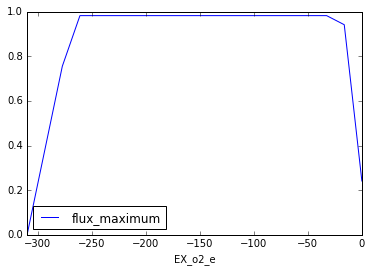

In [47]:
prod_env.plot( kind='line', x='EX_o2_e', y='flux_maximum')

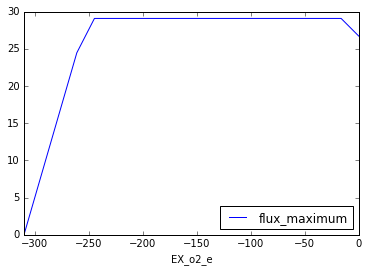

In [48]:
%matplotlib inline
from cobra.flux_analysis import production_envelope

prod_env = production_envelope( model, ["EX_o2_e"], 
            objective="EX_ac_e", carbon_sources="EX_glc_e")
prod_env.head()
prod_env.plot( kind='line', x='EX_o2_e', y='flux_maximum');

Ejercicio
---------

* Realizar este gráfico para la red de ecoli variando el consumo de glucosa y oxigeno.

Nota: deberas identificar las reacciones asociados al consumo de glucosa y oxigeno (pista: usa el comando `model.summary()` ).

In [ ]:
model = cobra.test.create_test_model("ecoli")


for rxn in model.metabolites.get_by_id("glc__D_e").reactions:
    print rxn, rxn.reaction
    


In [ ]:
prod_env = production_envelope( model, ["EX_o2_e"],  carbon_sources="EX_glc_e")
prod_env.plot( kind='line', x='EX_o2_e', y='carbon_yield_maximum')#;carbon_yield_maximum	

Building a model
=========

Ahora construiremos nuestra propia red metaolica usando como ejemplo la red metanogénica que vimos en la clase pasada:

<img src="https://raw.githubusercontent.com/modcommet/Clases/master/metanogenesis.png" width="400">

In [50]:
from cobra import Model, Reaction, Metabolite
cobra_model = Model('primordialMetabolism')

# Ractions
E1 = Reaction('E1')
E1.name = 'Exchange reaction of CO2'
E1.subsystem = 'Entrance'
E1.lower_bound = 10.  # This is the default
E1.upper_bound = 1000.  # This is the default
#E1.objective_coefficient = 0. # this is the default

E2 = Reaction('E2')
E2.name = 'Exchange reaction of H2'
E2.subsystem = 'Entrance'
E2.lower_bound = 0.  # This is the default
E2.upper_bound = 1000.  # This is the default
#E2.objective_coefficient = 0. # this is the default

R1 = Reaction('R1')
R1.name = 'First reaction'
R1.subsystem = 'Internal reaction'
R1.lower_bound = 0.  # This is the default
R1.upper_bound = 1000.  # This is the default
#R1.objective_coefficient = 0. # this is the default

R2 = Reaction('R2')
R2.name = 'Second reaction'
R2.subsystem = 'Internal reaction'
R2.lower_bound = 0.  # This is the default
R2.upper_bound = 1000.  # This is the default
#R2.objective_coefficient = 0. # this is the default

R3 = Reaction('R3')
R3.name = 'Third reaction'
R3.subsystem = 'Internal reaction'
R3.lower_bound = 0.  # This is the default
R3.upper_bound = 1000.  # This is the default
#R3.objective_coefficient = 0. # this is the default

E3 = Reaction('E3')
E3.name = 'Exchange reaction of CH4'
E3.subsystem = 'Exit'
E3.lower_bound = 0.  # This is the default
E3.upper_bound = 1000.  # This is the default
#E3.objective_coefficient = 0. # this is the default

E4 = Reaction('E4')
E4.name = 'Exchange reaction of F420'
E4.subsystem = 'Exit'
E4.lower_bound = 0.  # This is the default
E4.upper_bound = 1000.  # This is the default
#E4.objective_coefficient = 1. # this is the default

E5 = Reaction('E5')
E5.name = 'Exchange reaction of H20'
E5.subsystem = 'Exit'
E5.lower_bound = 0.  # This is the default
E5.upper_bound = 1000.  # This is the default
#E5.objective_coefficient = 0. # this is the default


# Agrega el resto de las reacciones

# Metabolites
CO2 = Metabolite('CO2', formula='CO2',name='carbon dioxide',compartment='c')
H2 = Metabolite('H2', formula='H2',name='H2',compartment='c')
F420 = Metabolite('F420', formula='F420',name='F420',compartment='c')
I1 = Metabolite('I1', formula='I1',name='I1',compartment='c')
H2O = Metabolite('H2O', formula='H2O',name='H2O',compartment='c')
CH4 = Metabolite('CH4', formula='CH4',name='CH4',compartment='c')


# Agrega el resto de los metabolitos

# Adding metabolites to reaction
E1.add_metabolites({CO2: 1.0})
E2.add_metabolites({H2: 2.0})
R1.add_metabolites({H2: -2.0,CO2:-1,F420:-1,I1:1})
R2.add_metabolites({I1:-1,H2:-2,CH4:1,F420:1})
R3.add_metabolites({I1:1,CH4:-1,F420:1,H2O:2})
E3.add_metabolites({CH4: -1.0})
E4.add_metabolites({F420: -1})
E5.add_metabolites({H2O: -2})


# ya sabes que hacer :P

# Add reactin to model
cobra_model.add_reaction(E1)
cobra_model.add_reaction(E2)
cobra_model.add_reaction(R1)
cobra_model.add_reaction(R2)
cobra_model.add_reaction(R3)
cobra_model.add_reaction(E3)
cobra_model.add_reaction(E4)
cobra_model.add_reaction(E5)


# lo mismo aquí

cobra_model.objective = 'E3'

Puedes revisar tu modelo con los siguientes comandos

In [51]:
# Iterate through the the objects in the model
print("Reactions")
print("---------")
for x in cobra_model.reactions:
    print("%s : %s" % (x.id, x.reaction))
print("Metabolites")
print("-----------")
for x in cobra_model.metabolites:
    print('%s : %s' % (x.id, x.formula))

Reactions
---------
E1 :  --> CO2
E2 :  --> 2.0 H2
R1 : CO2 + F420 + 2.0 H2 --> I1
R2 : 2 H2 + I1 --> CH4 + F420
R3 : CH4 --> F420 + 2 H2O + I1
E3 : CH4 --> 
E4 : F420 --> 
E5 : 2 H2O --> 
Metabolites
-----------
CO2 : CO2
H2 : H2
F420 : F420
I1 : I1
CH4 : CH4
H2O : H2O


Ejercicio
---------

* Simula los flujos de esta red metabólica.
    

In [53]:
solution = cobra_model.optimize()
#print solution.status
print solution.objective_value 
for i in cobra_model.reactions:
    print i.name, i.x

500.0
Exchange reaction of CO2 500.0
Exchange reaction of H2 1000.0
First reaction 500.0
Second reaction 500.0
Third reaction 0.0
Exchange reaction of CH4 500.0
Exchange reaction of F420 0.0
Exchange reaction of H20 0.0
